# Project description:

We have decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off.

*You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.*

**TABLE OF CONTENTS**

* [Part 1. Download the data and prepare it for analysis : Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.
File path: /datasets/rest_data_us.csv. Download dataset](#h1)
   
* [Part 2. Data analysis](#h2)
    * [2.1 Investigate the proportions of the various types of establishments. Plot a graph.](#sh2.1)
    * [2.2 Investigate the proportions of chain and nonchain establishments. Plot a graph.](#sh2.2)
    * [2.3 Which type of establishment is typically a chain?](#sh2.3)
    * [2.4 What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#sh2.4)
    * [2.5 Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.](#sh2.5)
    * [2.6 Put the data on street names from the address column in a separate column.](#sh2.6)
    * [2.7 Plot a graph of the top ten streets by number of restaurants.](#sh2.7)
    * [2.8 Find the number of streets that only have one restaurant.](#sh2.8)
    * [2.9 For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#sh2.9)
* [Part 3.CONCLUSION.](#h3)
    
* [Part 4. Preparing a presentation : Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment.](#h4)

    







<font color='green'><h2> Download the data and prepare it for analysis : <a class="anchor" id="h1"></a></h2></font>

Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.
File path: /datasets/rest_data_us.csv. Download dataset 

In [1]:
! pip install -q usaddress

In [2]:
#importing all the required files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
#importing library
import usaddress

In [3]:
df_data = pd.read_csv('/datasets/rest_data_us.csv')

# study general information 
df_data.info()
#displaying first 10 rows

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

display(df_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


the Data description on restaurants in LA
df_data table:
1. object_name — establishment name
2. chain — chain establishment (TRUE/FALSE)
3. object_type — establishment type
4. address — address
5. number — number of seats
<br>
we imported all the necessary files .it can be seen that we can preprocess the data by cleaning the adress column,as some of the address does not contain any street name or street number we can seperate them 

<font color='green'><h3>Preprocess the data<a class="anchor" id="sh1.1"></a></h3></font>

In [4]:
# cleaning the address column 
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'


In [5]:
df_data['clean_street_check']=df_data.address.apply(cleaning_check)

In [6]:
df_data

,id,object_name,address,chain,object_type,number,clean_street_check
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK"
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD"
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD"
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET"
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK"
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,"217,TEMPLE"
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,"5750,MELROSE"
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,"6741,HOLLYWOOD"
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,"548,SPRING"


In [7]:
#now we have to clean the rows with "no street number"
df_data[df_data['clean_street_check']=='no street or number']

,id,object_name,address,chain,object_type,number,clean_street_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [8]:
usaddress.parse(df_data.iloc[1888]['address'])

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

In [9]:
# final cleaning of the remaining rows
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [10]:
df_data['clean_street_final']=df_data.address.apply(cleaning_final)
df_data.sample(10)

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
4364,16150,CALIFORNIA PIZZA KITCHEN #,735 S FIGUEROA ST STE #305,True,Pizza,168,"735,FIGUEROA","735 FIGUEROA, Los Angeles,USA"
6980,18766,ALAMEDA STRIP,4209 S ALAMEDA ST,False,Restaurant,133,"4209,ALAMEDA","4209 ALAMEDA, Los Angeles,USA"
7952,19738,EL GRAN BURRITO RESTAURANT,4722 SANTA MONICA BLVD,True,Restaurant,25,"4722,MONICA","4722 MONICA, Los Angeles,USA"
8246,20032,CARRILLO'S RESTAURANT,254 W FLORENCE AVE,True,Restaurant,22,"254,FLORENCE","254 FLORENCE, Los Angeles,USA"
550,12336,SUBWAY #26578,1139 S HILL ST STE 110,True,Fast Food,9,"1139,HILL","1139 HILL, Los Angeles,USA"
5117,16903,MOM'S TAMALES,3328 PASADENA AVE,True,Restaurant,39,"3328,PASADENA","3328 PASADENA, Los Angeles,USA"
5095,16881,JACK IN THE BOX #250,2701 E CESAR E CHAVEZ AVE,True,Restaurant,38,"2701,CHAVEZ","2701 CHAVEZ, Los Angeles,USA"
2621,14407,PINKBERRY,2829 HYPERION AVE,True,Restaurant,17,"2829,HYPERION","2829 HYPERION, Los Angeles,USA"
5760,17546,SOUK SHAWARMA,1111 WILSHIRE BLVD # 104,False,Restaurant,11,"1111,WILSHIRE","1111 WILSHIRE, Los Angeles,USA"
1911,13697,EL COMPITA,4477 W PICO BLVD,False,Restaurant,13,"4477,PICO","4477 PICO, Los Angeles,USA"


In [11]:
df_data.duplicated().value_counts()

False    9651
dtype: int64

In [12]:
#cleaning of names 
def cleanNames(name):
    name = name

    # if # symbol in name, split it to remove numbers
    if '#' in name:
        name = name.split('#')[0].strip()
    
    # if - symbol in name, split it to remove numbers
    if '-' in name:
        tmp = name.split('-')

        if tmp[1].isdecimal():
            name = tmp[0].strip()
    
    return name

In [13]:
df_data['name'] = df_data.object_name.apply(cleanNames)

In [14]:
df_data

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final,name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK","3708 ROCK, Los Angeles,USA",HABITAT COFFEE SHOP
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD","100 WORLD, Los Angeles,USA",REILLY'S
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD","6801 HOLLYWOOD, Los Angeles,USA",STREET CHURROS
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET","1814 SUNSET, Los Angeles,USA",TRINITI ECHO PARK
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK","2100 PARK, Los Angeles,USA",POLLEN
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,"217,TEMPLE","217 TEMPLE, Los Angeles,USA",HALL OF JUSTICE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,"5750,MELROSE","5750 MELROSE, Los Angeles,USA",FIN-MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,"6741,HOLLYWOOD","6741 HOLLYWOOD, Los Angeles,USA",JUICY WINGZ
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,"548,SPRING","548 SPRING, Los Angeles,USA",MEDIDATE COFFEE


while looking into data details ,we have preprocessed the name and address column 
1. cleaning the address column ,we imported the address library to complete the process of cleaning and then created function cleaning_check which will still contain rows which does not have street number or name 
2. we created another function cleaning_final before that we checked out the rows ,as what they have in common .
3.then we created another function for cleaning name s where names contain # and - spaces between them .

<font color='green'><h2> Data analysis<a class="anchor" id="h2"></a></h2></font>

<font color='green'><h3>Investigate the proportions of the various types of establishments. Plot a graph.<a class="anchor" id="sh2.1"></a></h3></font>

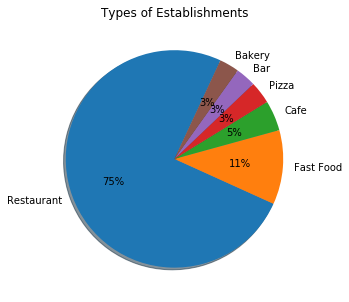

In [15]:
#calculating the proportions of various types by value count 
df_proportion = df_data['object_type'].value_counts().rename_axis('type').reset_index(name='count')
df_proportion
#plotting piechart for various types of establishment
plt.figure(figsize=(10, 5))
plt.pie(df_proportion['count'], labels=df_proportion['type'],autopct='%0.f%%', shadow=True, startangle=65)
plt.title('Types of Establishments')
plt.show()



 while Investigating the proportions of the various types of establishments.it can be seen that resturants count more than other establishments while bakery and bar at the lowest .the percentage of resturants chain is higher as it counts to 75% while fastfood is 11% and the other establishments are near to 5 or 3%

<font color='green'><h3>Investigate the proportions of chain and nonchain establishments. Plot a graph.<a class="anchor" id="sh2.2"></a></h3></font>

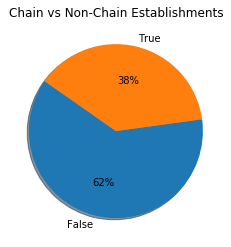

In [16]:
df_chain = df_data['chain'].value_counts().rename_axis('chain').reset_index(name='count')

# plot pie chart with proportions
plt.pie(df_chain['count'], labels=df_chain['chain'],autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Chain vs Non-Chain Establishments')
plt.show()

while investigating chain ,non-chain proportions .we calculated by calculating true and false in the columns .it can be seen that 38% of establishments are related with chain and 62% with non-chain.As,non chain dominates the chain by 24% of proportion.

<font color='green'><h3>Which type of establishment is typically a chain?<a class="anchor" id="sh2.3"></a></h3></font>

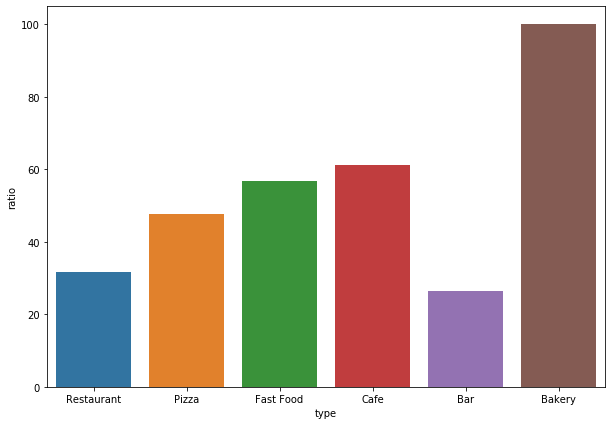

In [17]:
# only using the chain data
df_chaindata = df_data[df_data['chain'] == True]

# counting the types of establishments
df_chaindata = pd.pivot_table(df_chaindata,index=['chain','object_type'], values=['id'], aggfunc='count').reset_index()
df_chaindata.columns = ['chain', 'type', 'count']
df_chaindata = df_chaindata.sort_values(by='count', ascending=False)

# calculating total establishment 
df_testablishment = df_data['object_type'].value_counts().rename_axis('type').reset_index(name='total')

# using merge to join 
df_merge = pd.merge(df_chaindata, df_testablishment, how='inner', on='type')
df_merge['ratio'] = df_merge['count'] / df_merge['total'] * 100

# plot bar graph
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = df_merge.sort_values('type', ascending=False), 
                 x='type', 
                 y='ratio')


which type of establishment is typically a chain can be seen in the barplot .it shows bakery is all part of a chain with a ratio of 100%, cafe and fast food establishments are more than 50%.pizza is nearby to 50%.restaurants ,pizza and bar are less than 50% of proportion

<font color='green'><h3>What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?<a class="anchor" id="sh2.4"></a></h3></font>

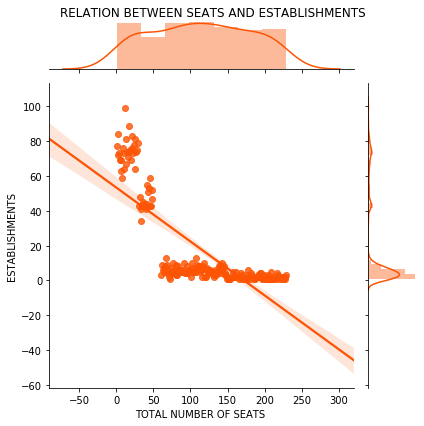

In [18]:
# using chain data with number of seats
df_chaindata = df_data[df_data['chain'] == True]
df_chaindata  = pd.pivot_table(df_chaindata , index=['number'], values=['id'], aggfunc=['count']).reset_index()
df_chaindata.columns = ['total_seats','count']
df_chaindata  = df_chaindata.sort_values(by='count', ascending=False)

# plot joint plot

p = sns.jointplot(x="total_seats", y="count", data=df_chaindata,kind='reg', color='#FC5404')

plt.xlabel('TOTAL NUMBER OF SEATS ')
plt.ylabel('ESTABLISHMENTS')
p.fig.suptitle('RELATION BETWEEN SEATS AND ESTABLISHMENTS')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) 
plt.show()

The joint plot above shows the correlation between the number of seats and the number of establishments. In general, most of the establishments have 50 or less seats, while less of the establishments have 50 or more seats. 

<font color='green'><h3>Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.<a class="anchor" id="sh2.5"></a></h3></font>

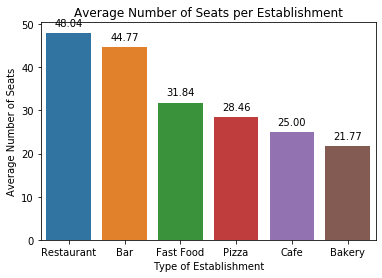

In [19]:
#calculating average seats 
df_avg  = pd.pivot_table(df_data , index=['object_type'], values=['number'], aggfunc=['mean']).reset_index()
df_avg.columns = ['Establishment','SEATS']
df_avg  = df_avg.sort_values(by='SEATS', ascending=False)
ax = sns.barplot(data = df_avg, 
                 x='Establishment', 
                 y='SEATS')

# Add titles and captions
plt.xlabel('Type of Establishment')
plt.ylabel('Average Number of Seats')
plt.title('Average Number of Seats per Establishment')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

The above graph shows the average number of seats for each type of establishment. On average, restaurants have the greatest amount of seats almost 50 seats,while bar is nearby to 45.The lowest is for the bakery which is between 20 to 30.
1. restuarants have the highest number of seats as by 48.4 
2. bar has 44.77
3. fastfood is having average of 31.84
4. pizza by 28.64
5. cafe have the average seats of 25 
6. the bakery is having average of 21.77 which is the lowest in the establishment.

<font color='green'><h3>Put the data on street names from the address column in a separate column.<a class="anchor" id="sh2.6"></a></h3></font>

In [20]:
#using regex method to calculate the street name from adress column
df_data['street_names']= df_data.clean_street_final.str.extract(r"(?P<CleanName> \w{2,}[a-zA-Z ]+)")
df_data

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final,name,street_names
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK","3708 ROCK, Los Angeles,USA",HABITAT COFFEE SHOP,ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD","100 WORLD, Los Angeles,USA",REILLY'S,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD","6801 HOLLYWOOD, Los Angeles,USA",STREET CHURROS,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET","1814 SUNSET, Los Angeles,USA",TRINITI ECHO PARK,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK","2100 PARK, Los Angeles,USA",POLLEN,PARK
...,...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,"217,TEMPLE","217 TEMPLE, Los Angeles,USA",HALL OF JUSTICE,TEMPLE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,"5750,MELROSE","5750 MELROSE, Los Angeles,USA",FIN-MELROSE,MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,"6741,HOLLYWOOD","6741 HOLLYWOOD, Los Angeles,USA",JUICY WINGZ,HOLLYWOOD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,"548,SPRING","548 SPRING, Los Angeles,USA",MEDIDATE COFFEE,SPRING


<font color='green'><h3>Plot a graph of the top ten streets by number of restaurants.<a class="anchor" id="sh2.7"></a></h3></font>

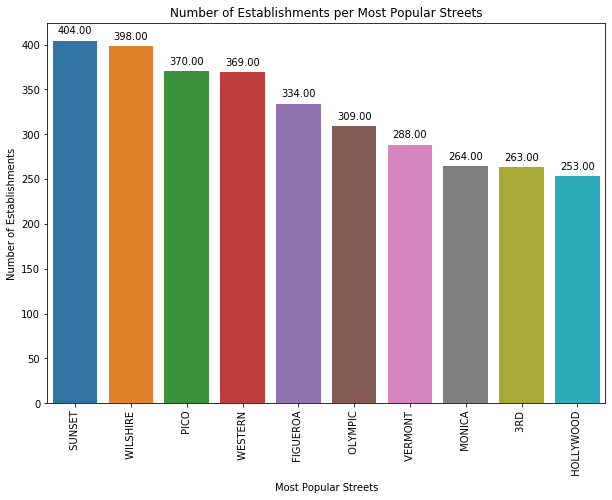

In [21]:
#calculating top 10 streets by count values 
df_street = pd.pivot_table(df_data, index=['street_names'], values=['id'], aggfunc=['count']).reset_index()
df_street.columns = ['street','count']
df_street1 = df_street.sort_values(by='count', ascending=False).head(10)


plt.figure(figsize=(10, 7))

ax = sns.barplot(data = df_street1, 
                 x='street', 
                 y='count')


plt.xlabel('Most Popular Streets')
plt.ylabel('Number of Establishments')
plt.title('Number of Establishments per Most Popular Streets')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=90)
plt.show()

the bar graph shows the top ten streets by number of restaurants.the top one is the sunset blvd then pico blvd .The last ones are wilshire blvd and beverly blvd.sunset have the highest number of establishment nearly to 404 then wilshire is with 398 establishments.the 9th and 10th streets are with 263 and 253 ,which are of 3rd and hollywood respectively.maybe thesestreets are nearby to hub area and crowded places for people to come easily to enjoy there leisure time.

<font color='green'><h3>Find the number of streets that only have one restaurant.<a class="anchor" id="sh2.8"></a></h3></font>

In [22]:
df_street2 = df_street[df_street['count'] == 1]
#num_street = len(df_street2)
#num_street
df_street2

,street,count
1,10TH,1
3,11th,1
7,16TH,1
8,17TH,1
9,18TH,1
...,...,...
437,ZOO,1
438,hollywood,1
439,pico,1
440,sunset,1


hence there are 174 number of streets that only have one restaurant.as we counted the streets with one resturant by placing the count value to 1.some streets like 10th ,11th 16th ,zoo,pico.these are small streets and are not that much crowded.

<font color='green'><h3>For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?<a class="anchor" id="sh2.9"></a></h3></font>

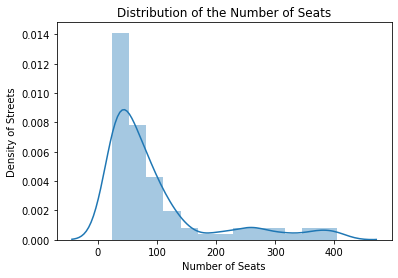

In [23]:
# calculate avg number of restaurants per street, extract only those greater than avg
avg_num = df_street['count'].mean().round()
avg_street = df_street[df_street['count'] > avg_num]

# plot distribution plot
ax = sns.distplot(avg_street['count'])
ax.set_title('Distribution of the Number of Seats')
ax.set_xlabel('Number of Seats')
ax.set_ylabel('Density of Streets')
plt.show()

For streets with a lot of restaurants,the distribution of seats show .most of the establishments have seats between less than 100 .The graphsshows most of the establishment have less than 60 and 70 seats .

<font color='green'><h2> CONCLUSION<a class="anchor" id="h3"></a></h2></font>

We have decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we have decided to try to attract investors. They’re interested in the current market conditions—will you be able to maintain the success when the novelty of robot waiters wears off.

We’re an analytics guru, so we have been  asked you to prepare some market research. We have open-source data on restaurants in LA.
1. first of all we have downloaded the data and prepared it for analysis : Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. File path: /datasets/rest_data_us.csv. Downloaded dataset
2.the Data description on restaurants in LA df_data table:
   1. object_name — establishment name
   2. chain — chain establishment (TRUE/FALSE)
   3. object_type — establishment type
   4. address — address
   5. number — number of seats
we have imported all the necessary files .it can be seen that we can preprocess the data by cleaning the adress column,as some of the address does not contain any street name or street number we can seperate them
3. Secondly while looking into data details ,we have preprocessed the name and address column ,cleaning the address column ,we imported the address library to complete the process of cleaning and then created function cleaning_check which will still contain rows which does not have street number or name, we created another function cleaning_final before that we checked out the rows ,as what they have in common .then we created another function for cleaning name s where names contain # and - spaces between them .
4. thirdly we analyzed the data
     1. while Investigating the proportions of the various types of establishments.it can be seen that resturants count more than other establishments while bakery and bar at the lowest .
     2. while investigating chain ,non-chain proportions .we calculated by calculating true and false in the columns .it can be seen that 38% of establishments are related with chain and 62% with non-chain.
     3. which type of establishment is typically a chain can be seen in the barplot .it shows bakery is all part of a chain with a ratio of 100%, cafe and fast food establishments are more than 50%.pizza is nearby to 50%.restaurants ,pizza and bar are less than 50% of proportion
     4. The joint plot above shows the correlation between the number of seats and the number of establishments. In general, most of the establishments have 50 or less seats, while less of the establishments have 50 or more seats.
     5. The above graph shows the average number of seats for each type of establishment. On average, restaurants have the greatest amount of seats almost 50 seats,while bar is nearby to 45.The lowest is for the bakery which is between 20 to 30.
     6. the bar graph shows the top ten streets by number of restaurants.the top one is the sunset blvd then pico blvd .The last ones are wilshire blvd and beverly blvd.
     7. For streets with a lot of restaurants,the distribution of seats show .most of the establishments have seats between less than 100 .The graphsshows most of the establishment have less than 60 and 70 seats .

Overall it can be concluded that the most profitable and worthwhile food establishment to invest in would be either a restaurant or a bar with anywhere between 40-50 seats that is located on any one of those 10 most popular streets mentioned above.As, non chain dominates the market maybe we can start with non chain then after some time we can develop the chain establishment





<font color='green'><h2> Part 4. Preparing a presentation : Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment. <a class="anchor" id="h4"></a></h2></font>

Presentation: <https://drive.google.com/file/d/1pdEm6-MnNByOdMNaLwUR3ClGAc2G1QqD/view?usp=sharing>
